In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Data visualisation

We first examine the train dataset.

In [125]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
print(train_data.columns)
train_data.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [129]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The target value we want to predict is the 'Survived' column. It is encoded with 0 if the passenger did not survive and 1 if the passenger survived. We examine the proportion of the two classes.

0    549
1    342
Name: Survived, dtype: int64
Graphic representation of train data : target survived


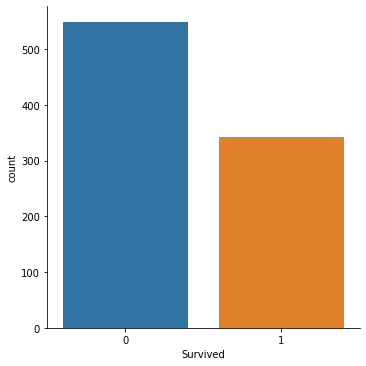

In [130]:
print(train_data.Survived.value_counts())
print('Graphic representation of train data : target survived')
sns.catplot(x='Survived', kind='count', data = train_data)

Everyone knows the widespread popular belief : "Women and children first". 
We calculate the survival rate of men and women.


male      577
female    314
Name: Sex, dtype: int64
% of women who survived = 0.742038
% of men who survived = 0.188908
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64
Graphic representation of train data : Sex influence on survival


<AxesSubplot:xlabel='Sex', ylabel='count'>

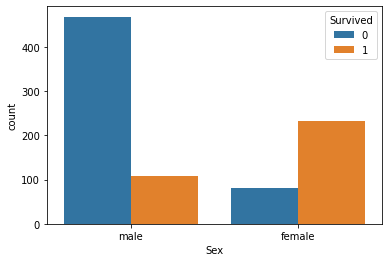

In [131]:
print(train_data.Sex.value_counts())
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived = {:f}".format(rate_women))
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived = {:f}".format(rate_men))
print(train_data.groupby('Sex').Survived.value_counts())
print('Graphic representation of train data : Sex influence on survival')
sns.countplot(x='Sex', hue='Survived', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

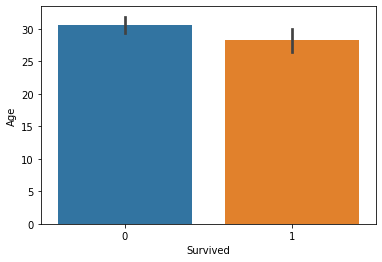

In [132]:
sns.barplot(y='Age', x='Survived', data=train_data)

From the Titanic train data we observe that the survival rate of women is higher than the one of men. The average age of passengers who survived is also lower.

However a study performed by researchers at Uppsala University from several sinking datasets has shown that men had the more important survival rate   (see https://www.thelocal.se/20120412/40216/) .

We now visualise the influence of the passengers class.

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64
% of 1st class who survived: 0.629630
% of 2nd class who survived: 0.472826
% of 3rd class who survived: 0.242363
Graphic representation of train data : Pclass influence on survival


<AxesSubplot:xlabel='Pclass', ylabel='count'>

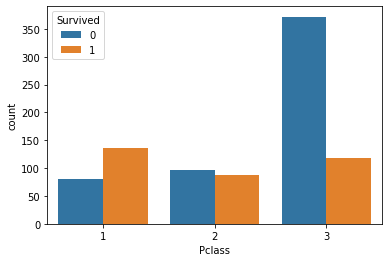

In [133]:
print(train_data.groupby('Pclass').Survived.value_counts())
firstClass = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_firstClass = sum(firstClass)/len(firstClass)
scdClass = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_scdClass = sum(scdClass)/len(scdClass)
thdClass = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_thdClass = sum(thdClass)/len(thdClass)
print("% of 1st class who survived: {:f}\n% of 2nd class who survived: {:f}\n% of 3rd class who survived: {:f}".format(rate_firstClass,rate_scdClass,rate_thdClass))
print('Graphic representation of train data : Pclass influence on survival')
sns.countplot(x='Pclass', hue='Survived', data=train_data)

Graphic representation of test data : sex


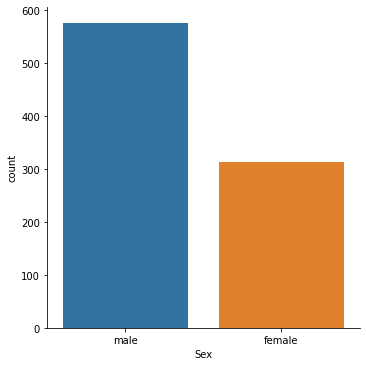

In [134]:
print('Graphic representation of test data : sex')
sns.catplot(x='Sex', kind='count', data = train_data)

# 2. Machine learning model

We split our training dataset between target and data.

In [135]:
y=train_data.Survived
X=train_data.drop(["PassengerId","Survived"], axis=1)
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We examine which columns have missing values

In [136]:
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
print(cols_with_missing)


['Age', 'Cabin', 'Embarked']


We split the dataset in train and validation data.

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

We evaluate the cardinality of categorical columns.

In [138]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Sex', 2), ('Embarked', 3), ('Cabin', 127), ('Ticket', 569), ('Name', 712)]

In [139]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)
# Select numerical columns
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train_pipe = X_train[my_cols].copy()
X_valid_pipe = X_valid[my_cols].copy()

Categorical columns that will be one-hot encoded: ['Sex', 'Embarked']

Categorical columns that will be dropped from the dataset: ['Cabin', 'Ticket', 'Name']


# Preprocessing steps

In [140]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, low_cardinality_cols)
    ])

# Machine learning model

In [141]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, max_depth=12, random_state=0)



# Pipeline definition and evaluation

In [142]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train_pipe, y_train)


train_preds = my_pipeline.predict(X_train_pipe)
# Preprocessing of validation data, get predictions
valid_preds = my_pipeline.predict(X_valid_pipe)

Evaluation of the accuracy score

In [143]:
from sklearn.metrics import accuracy_score
print("train score = ",accuracy_score(y_train, train_preds))
print("test score = ",accuracy_score(y_valid, valid_preds))

train score =  0.9620786516853933
test score =  0.8491620111731844


# Predictions for the test dataset

In [144]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
X_test=test_data.copy()
X_test_pipe = X_test[my_cols].copy()

In [145]:
test_preds = my_pipeline.predict(X_test_pipe)

In [146]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_preds})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
